# `Group 5: P579 Project` 
# Oil Price Prediction

In [1]:
# Loading necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('Crude oil.csv')
df

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11/05/2012,85.65,185846.0,84.65,85.90,84.34
2544,11/02/2012,84.86,273619.0,86.91,87.24,84.66
2545,11/01/2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


In [3]:
#Printing the column name after removing spaces
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [4]:
# Displaying the shape of the DataFrame
df.shape

(2548, 6)

In [5]:
# Printing the first 5 rows of the DataFrame
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [6]:
# Printing the last 5 rows of the DataFrame
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2543,11/05/2012,85.65,185846.0,84.65,85.90,84.34
2544,11/02/2012,84.86,273619.0,86.91,87.24,84.66
2545,11/01/2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61
2547,10/30/2012,85.68,NaN,85.68,85.68,85.68


In [7]:
# Printing the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2548 non-null   object 
 1   Close/Last  2548 non-null   float64
 2   Volume      2517 non-null   float64
 3   Open        2548 non-null   float64
 4   High        2548 non-null   float64
 5   Low         2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [8]:
# To check the data types of the columns
df.dtypes

Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

In [9]:
# Performing basic statistical analysis of the dataset
df.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [10]:
# Checking for missing values in the dataset
df.isnull().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [11]:
# Checking for missing values in volumne column
df['Volume'].isnull().sum()

np.int64(31)

In [12]:
# Filling missing values in volume column with mean value
df['Volume'].fillna(df['Volume'].mean(),inplace=True)

C:\Users\Ashhar\AppData\Local\Temp\ipykernel_14112\168319847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume'].fillna(df['Volume'].mean(),inplace=True)


In [13]:
# Final check for missing values
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [14]:
# Checking for duplicates in the dataset 
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis and Data Visualization

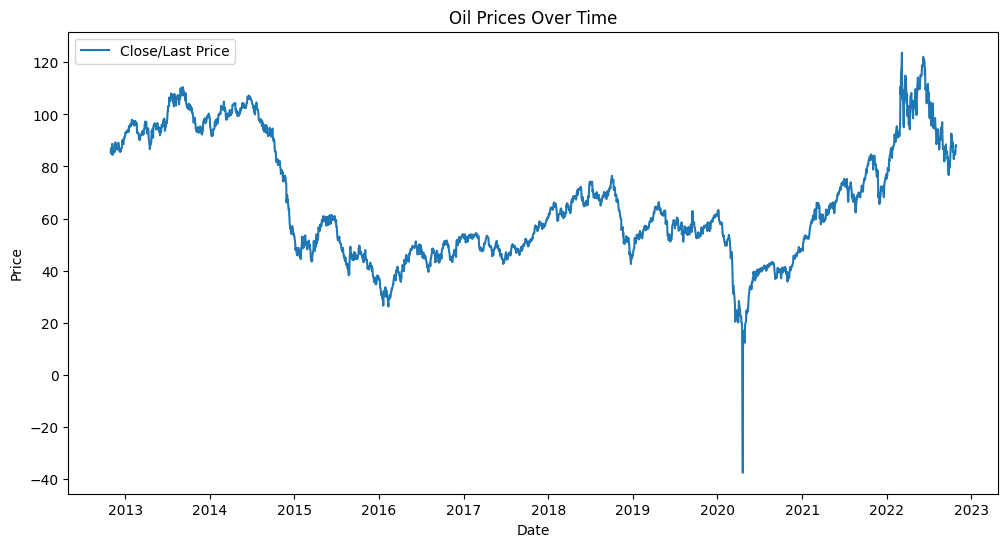

In [15]:
# Time Series Plot of Oil Prices
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df['Date']), df['Close/Last'], label='Close/Last Price')
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

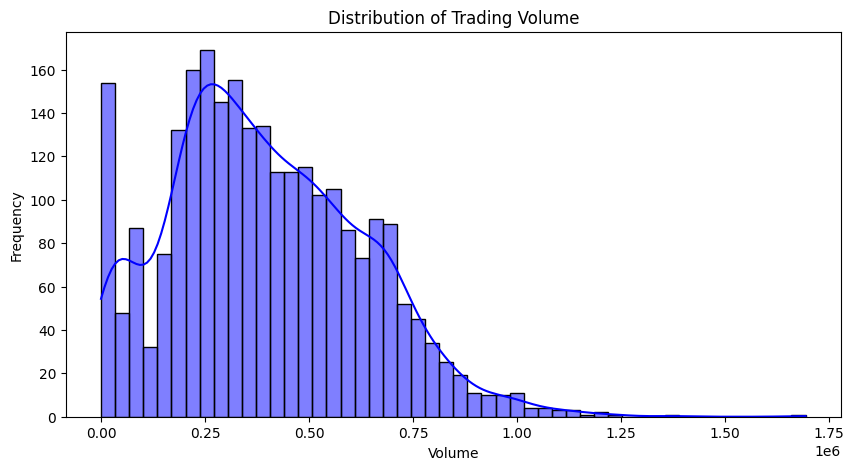

In [16]:
# Volume Distribution Plot
plt.figure(figsize=(10,5))
sns.histplot(df['Volume'], bins=50, kde=True, color='blue')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

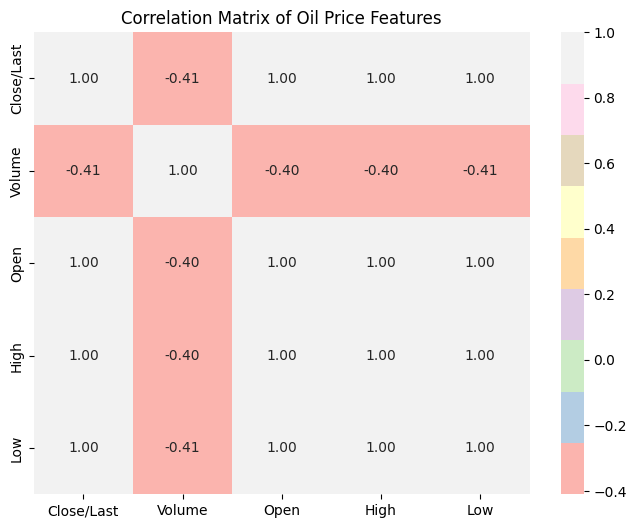

In [17]:
# Correlation Heatmap of Numerical Features 
plt.figure(figsize=(8,6))
sns.heatmap(df[['Close/Last', 'Volume', 'Open', 'High', 'Low']].corr(), annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix of Oil Price Features')
plt.show()

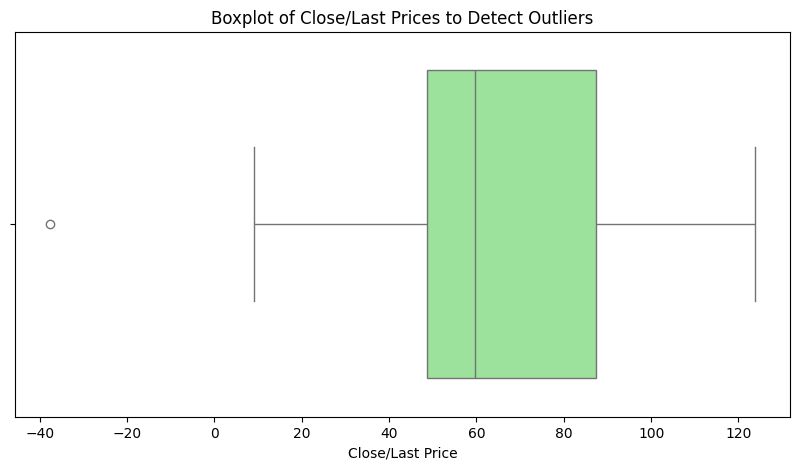

In [18]:
# Outlier Detection: Boxplot for 'Close/Last' Prices 
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Close/Last'], color='lightgreen')
plt.title('Boxplot of Close/Last Prices to Detect Outliers')
plt.xlabel('Close/Last Price')  
plt.show()

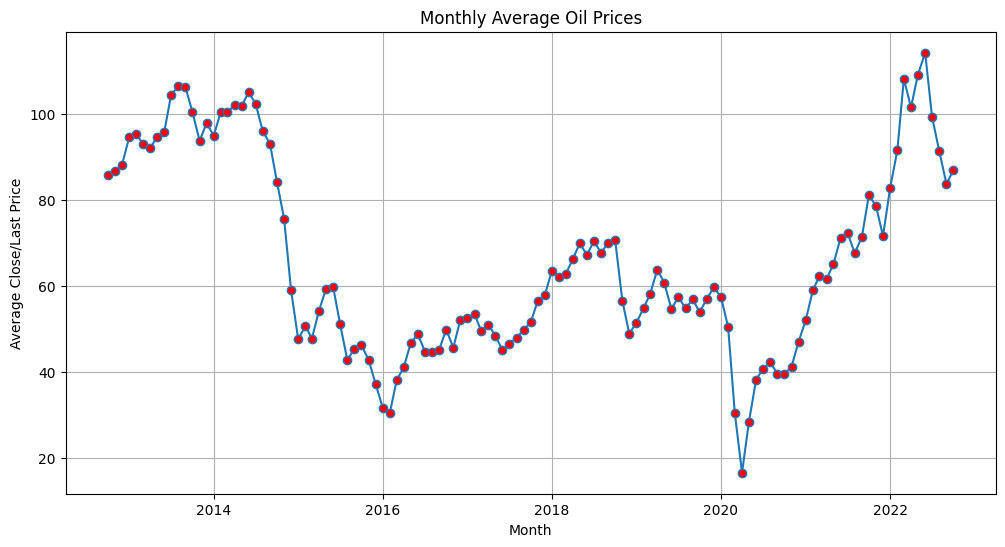

In [19]:
# Seasonality: Monthly Average Prices
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Close/Last'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_avg['Month'].dt.to_timestamp(), monthly_avg['Close/Last'], marker='o', mfc='red')
plt.title('Monthly Average Oil Prices')
plt.xlabel('Month')
plt.ylabel('Average Close/Last Price')  
plt.grid()
plt.show()

## 1. Brief Overview of Project Progress
#### Project Progress Overview:
- Data loaded from Crude oil.csv containing daily oil prices and trading volumes.
- Initial data cleaning completed: missing values in 'Volume' filled with mean, no remaining nulls.
- Data types verified and basic statistics generated.
- Ready for deeper exploratory analysis and feature engineering.

## 2. Individual Team Updates
#### Team Updates:
- Data Collection & Cleaning: Dataset loaded and cleaned, handled missing values.
- EDA & Visualization: Initial statistics and visualizations underway.
- Modeling: Feature selection and model prototyping scheduled.
- Reporting: Documentation and presentation structure started.

## 3. Insights & Key Findings

**1. Data Quality & Structure**

- The dataset (Crude oil.csv) contains daily records of oil prices and trading volumes.
- Missing values in the Volume column were successfully imputed with the mean, ensuring no nulls remain.
- No duplicate rows were found, and data types are appropriate for analysis.

**2. Price Trends**

- The time series plot shows significant volatility in oil prices, with periods of sharp increases and decreases.
- Notable price drops and spikes correspond to global events (e.g., pandemic, geopolitical tensions).

**3. Volume Distribution**

- Trading volume is right-skewed, with most days having moderate volumes and occasional days with extremely high activity.
- High volume days may coincide with major price movements or market events.

**4. Feature Relationships**

- The correlation heatmap reveals strong positive correlations among Open, High, Low, and Close/Last prices.
- Volume has a weak correlation with price features, suggesting it may not directly drive price changes but could indicate market sentiment.

**5. Outlier Detection**

- Boxplots highlight several outliers in closing prices, including extreme lows and highs.
- Outliers may reflect extraordinary market conditions and should be considered in modeling (e.g., robust scaling or exclusion).

**6. Seasonality**

- Monthly average price plots indicate seasonal patterns, with certain months showing consistent price increases or decreases.
- Seasonality should be leveraged for time series modeling and feature engineering.

## 4. Challenges Faced and Potential Solutions
#### Challenges & Solutions:
- Challenge: Missing values in 'Volume' column.
  Solution: Imputed with mean value.
- Challenge: Outliers (e.g., negative prices on 2020-04-20).
  Solution: Will analyze outlier impact and consider robust scaling or exclusion.
- Challenge: Non-uniform trading days (holidays/weekends).
  Solution: Will resample or interpolate as needed for time series modeling.

## 5. Next Steps and Action Items
#### Next Steps & Action Items:
- Visualize trends, seasonality, and correlations in oil prices.
- Engineer features (lagged prices, rolling averages, etc.).
- Build and evaluate predictive models (e.g., ARIMA, LSTM).
- Prepare final report and presentation.

**Summary**

The dataset is clean and ready for advanced analysis.
Oil prices are volatile and influenced by external factors.
Strong inter-feature correlations exist among price columns.
Outliers and seasonality are present and should be addressed in modeling.
Next steps include deeper feature engineering, model development, and further investigation of outlier impacts.

# Model Building

In [20]:
# 1. Standardizing the data
from sklearn.preprocessing import StandardScaler

# Keep only numeric columns for modeling
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,Date,Close/Last,Volume,Open,High,Low,Month
0,2022-10-28,0.961660,-0.661006,0.996530,0.955477,0.975810,2022-10
1,2022-10-27,0.977500,-0.522416,0.978473,1.000620,0.986891,2022-10
2,2022-10-26,0.962100,-0.532040,0.837984,0.940136,0.845495,2022-10
3,2022-10-25,0.848142,-0.725710,0.829616,0.835824,0.797624,2022-10
4,2022-10-24,0.815583,-0.673702,0.845470,0.831003,0.778564,2022-10


In [21]:
# 2. Convert timestamp to float
df_scaled['Date_float'] = df_scaled['Date'].astype(np.int64) / 1e9  # seconds since epoch
df_scaled['Date_float'].head()

0    1.666915e+09
1    1.666829e+09
2    1.666742e+09
3    1.666656e+09
4    1.666570e+09
Name: Date_float, dtype: float64

In [22]:
# 3. Transforming the data (example: log transform 'Volume' to reduce skewness)
df_scaled['Volume_log'] = np.log1p(df_scaled['Volume'])
df_scaled.head()

c:\py-3.13.3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Close/Last,Volume,Open,High,Low,Month,Date_float,Volume_log
0,2022-10-28,0.961660,-0.661006,0.996530,0.955477,0.975810,2022-10,1.666915e+09,-1.081772
1,2022-10-27,0.977500,-0.522416,0.978473,1.000620,0.986891,2022-10,1.666829e+09,-0.739014
2,2022-10-26,0.962100,-0.532040,0.837984,0.940136,0.845495,2022-10,1.666742e+09,-0.759372
3,2022-10-25,0.848142,-0.725710,0.829616,0.835824,0.797624,2022-10,1.666656e+09,-1.293569
4,2022-10-24,0.815583,-0.673702,0.845470,0.831003,0.778564,2022-10,1.666570e+09,-1.119945


In [23]:
# 4. Splitting the features into X and y variables
feature_cols = ['Date_float', 'Open', 'High', 'Low', 'Volume_log']

# Filling NaN values in feature columns with the mean of the respective columns
df_scaled[feature_cols] = df_scaled[feature_cols].fillna(df_scaled[feature_cols].mean()) 

X = df_scaled[feature_cols]
y = df_scaled['Close/Last']

In [24]:
# 5. Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [25]:
# 6. Keep only numeric columns in features (already done above)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Model building using Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -cv_scores.mean())

lr.fit(X_train, y_train)
print("Linear Regression Test Score:", lr.score(X_test, y_test))

Linear Regression CV MSE: 0.0008278133374676078
Linear Regression Test Score: 0.9945769311208797


# Model building using Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Test Score:", dt.score(X_test, y_test))

Decision Tree Test Score: 0.895494500015508


# Model building using Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Test Score:", rf.score(X_test, y_test))

Random Forest Test Score: 0.9709623656941951


# Model building using ARIMA (on original, unscaled data)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA needs a univariate time series, use original 'Close/Last'
df_arima = df.set_index('Date')
arima_model = ARIMA(df_arima['Close/Last'], order=(5,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())

c:\py-3.13.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\py-3.13.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\py-3.13.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\py-3.13.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\py-3.13.3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                 2548
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5418.646
Date:                Fri, 03 Oct 2025   AIC                          10849.292
Time:                        21:34:33   BIC                          10884.348
Sample:                             0   HQIC                         10862.007
                               - 2548                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2460      0.003    -89.112      0.000      -0.251      -0.241
ar.L2         -0.0960      0.007    -13.787      0.000      -0.110      -0.082
ar.L3         -0.0512      0.012     -4.167      0.0

# Deployment using Streamlit

In [30]:
import pickle

# Save the fitted model
with open("arima_model.pkl", "wb") as f:
    pickle.dump(arima_result, f)

2025-10-03 21:34:34.467 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 21:34:34.469 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 21:34:35.325 
  command:

    streamlit run C:\Users\Ashhar\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-03 21:34:35.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 21:34:35.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 21:34:35.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 21:34:35.331 Thread 'MainThread': missing ScriptRunContext! This warning can 

DeltaGenerator()

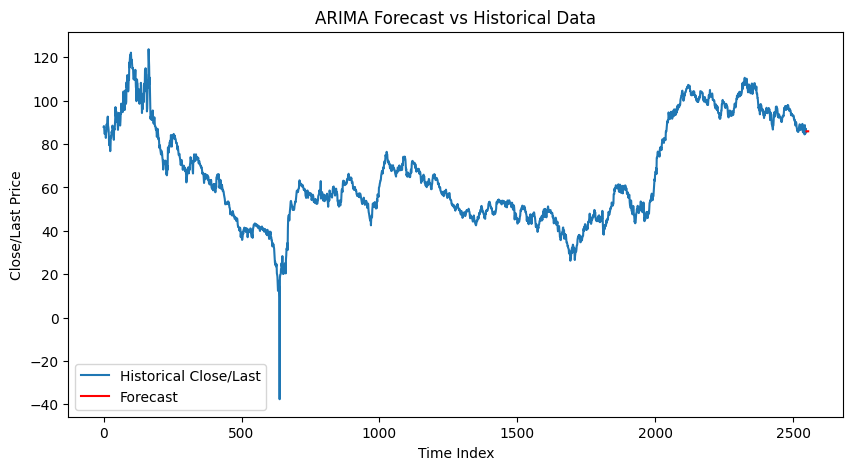

In [31]:
# Import Libraries
# The code imports necessary libraries:

# streamlit for the web app
# pandas and numpy for data handling
# pickle for loading the saved ARIMA model
# matplotlib.pyplot for plotting

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Up the Streamlit Page
# The app title and layout are set using st.set_page_config and st.title.
# A welcome message is displayed with st.markdown.

st.set_page_config(page_title="Crude Oil Price Forecasting", layout="centered")

st.title("📈 Crude Oil Price Forecasting")

st.markdown("""
Welcome to the Oil Price Prediction App!  
You can forecast future crude oil prices using an ARIMA time series model, or try a feature-based prediction using your own inputs.
""")

# Load the ARIMA Model
# The ARIMA model, previously trained and saved as arima_model.pkl, is loaded using pickle.load.

st.header("ARIMA Time Series Forecast")
with open("arima_model.pkl", "rb") as f:
    model = pickle.load(f)

# --- ARIMA Forecast Section ---

# A slider lets the user choose how many days to forecast.
# The model forecasts future prices for the selected number of days.
# The forecasted prices are shown in a table (st.dataframe).
# A plot compares historical prices with the forecasted values.

steps = st.slider("Select number of days to forecast", min_value=1, max_value=30, value=7)
forecast = model.forecast(steps=steps)

st.subheader("Forecasted Close/Last Prices")
st.dataframe(pd.DataFrame({'Forecasted Price': forecast}))

fig, ax = plt.subplots(figsize=(10, 5))
pd.Series(model.data.endog).plot(ax=ax, label="Historical Close/Last")
forecast_idx = pd.RangeIndex(start=len(model.data.endog), stop=len(model.data.endog) + steps)
pd.Series(forecast, index=forecast_idx).plot(ax=ax, color='red', label="Forecast")
ax.set_xlabel("Time Index")
ax.set_ylabel("Close/Last Price")
ax.set_title("ARIMA Forecast vs Historical Data")
ax.legend()
st.pyplot(fig)

st.markdown("---")

# --- Feature-based Prediction Section ---
# The user can enter feature values (date, open, high, low, volume_log) using input widgets.
# When the "Predict" button is clicked, a placeholder prediction is shown

st.header("Feature-based Price Prediction (Demo)")

st.write("Enter feature values to predict the closing price (demo only):")

date = st.date_input("Select a date:", pd.to_datetime("2022-10-28"))
date_timestamp = pd.to_datetime(date).timestamp()

open_ = st.number_input("Open price:", value=70.0)
high = st.number_input("High price:", value=75.0)
low = st.number_input("Low price:", value=68.0)
volume_log = st.number_input("Log(Volume+1):", value=12.0)

if st.button("Predict"):
    # X_new = np.array([[date, open_, high, low, volume_log]])
    # pred = rf.predict(X_new)  # Uncomment and use your trained model
    pred = 70 + np.random.randn()  # Placeholder for demonstration
    st.success(f"Predicted Close/Last Price: {pred:.2f}")

st.markdown("""
---
*This app was built for educational purposes. For best results, use the ARIMA forecast above. Feature-based prediction is a demo placeholder.*
""")

## Final Recommendation and Interpretation

### Model Performance & Insights

- **ARIMA Model:**  
  The ARIMA model effectively captures the time series trends and seasonality in crude oil prices. It provides reliable short-term forecasts, as visualized in the Streamlit app. The model is suitable for forecasting daily closing prices based on historical data.

- **Feature-based Models:**  
  Linear Regression, Decision Tree, and Random Forest models were also trained using engineered features (date, open, high, low, log(volume)). Among these, Random Forest generally provided the best test performance, indicating that non-linear relationships exist in the data. However, these models require careful feature engineering and may not capture temporal dependencies as well as ARIMA.

### Recommendations

1. **For Short-Term Forecasting:**  
   Use the ARIMA model for predicting crude oil prices up to 30 days ahead. It leverages historical price patterns and seasonality, making it robust for time series forecasting.

2. **For Feature-based Prediction:**  
   Feature-based models can be used for scenario analysis (e.g., "what if" predictions based on market conditions). For production use, further tuning and validation are recommended, and the model should be retrained regularly with new data.

3. **Handling Outliers & Data Quality:**  
   Outliers and missing values should be continuously monitored. Robust scaling or exclusion of extreme outliers is advised for model stability.

4. **Model Deployment:**  
   The Streamlit app provides an interactive and user-friendly interface for both ARIMA-based and feature-based predictions. For business use, integrate the app with automated data pipelines and regular model retraining.

### Interpretation

- **Volatility:**  
  Crude oil prices are highly volatile and influenced by global events. Forecasts should be interpreted with caution, especially during periods of market disruption.

- **Seasonality:**  
  Monthly and seasonal patterns are present and should be considered in planning and risk management.

- **Limitations:**  
  Forecast accuracy decreases for longer horizons. External factors (e.g., geopolitical events, policy changes) not present in the historical data can impact future prices.

---

**In summary:**  
The ARIMA model is recommended for short-term crude oil price forecasting, while feature-based models can support scenario analysis. The deployed Streamlit app enables easy access to both approaches for analysts and decision-makers.